# 言語処理100本ノック 2015

## 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』に形態素解析器MeCabを適用し，小説中の単語の統計を求めます． 

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．


In [ ]:
%%sh
# brew install mecab mecab-ipadic swig

In [3]:
%%sh
curl -fsSL http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt > data/neko.txt
ls data/

col1.txt
col2.txt
hightemp.txt
jawiki-country.json
neko.txt


In [35]:
%%sh
mecab data/neko.txt > data/neko.txt.mecab

In [97]:
%%sh
echo "表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音"
head -n 15 data/neko.txt.mecab

表層形	品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ


### 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．


In [114]:
with open('data/neko.txt.mecab', 'r') as f:
    mors = []
    mor = []
    for l in f.readlines():
        if l == 'EOS\n':
            if len(mor) > 0:
                mors.append(mor)
                mor = []
        else:
            mor.append(l)

def parse_mor(m):
    parsed = {}
    tmp1 = m.split('\t')
    parsed['surface'] = tmp1[0]        
    tmp2 = tmp1[1].split(',')
    parsed['base'] = tmp2[6]
    parsed['pos'] = tmp2[0]
    parsed['pos1'] = tmp2[1]
    return parsed
    
parsed_list = [[parse_mor(m) for m in mor] for mor in mors]
parsed_list[:10]

[[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'},
  {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'},
  {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'},
  {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'},
  {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'},
  {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}],
 [{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'},
  {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'},
  {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'

### 31. 動詞

動詞の表層形をすべて抽出せよ．


In [90]:
from functools import reduce
from operator import add

list_len = sum([len(m) for m in parsed_list])
flat_list = reduce(add, parsed_list)
print(list_len)
print(len(flat_list))

206338
206338


In [93]:
verb_surface = set([m['surface'] for m in flat_list if m['pos'] == '動詞'])
print(len(verb_surface))
print(verb_surface)

3893
{'取り乱さ', '寝そべっ', '捉え', '買う', '割り込む', '安んずる', '行け', 'かま', '諦める', 'られれ', '申し込ま', 'わか', '焦る', '追い廻し', '窺う', '着こなさ', '煩わし', '留まる', '打て', '気がつく', '乗り越え', '咎めん', '組ん', '引掻い', '聞かさ', '戴い', '見廻', 'できる', 'くりゃる', 'こ', '捨て', '抛り', '張り上げ', '処せ', '出合っ', '思っ', 'すくん', '受け合わ', '真似れ', '話せる', '上がれ', '供し', '振り上げ', '扱が', '聞き合せ', 'たらし', 'かよう', '持ち出し', 'しらべ', '罷り', 'あせる', 'たのま', '悟れ', '若か', '放し', '促し', '含ん', '吹き払い', '絶つ', 'せまら', 'まじり', '真面目くさっ', 'ぼり', '利かし', '煮え', '死ね', 'あばれる', 'ほめ', '乗せ', 'そり返っ', 'なりすまし', 'あつかい', '懸ら', '張ら', '集まれ', 'ぬから', '惚れ', '休ん', '彫り', '潜っ', '立ち退き', '坐る', '捕まる', '教えろ', '跳ね返し', 'わかり', 'いそが', '拡げ', '滑り込む', '曲っ', '売', '叩い', '怪しん', '割い', '使い', '活かす', '染め出し', 'あてがえ', '建つ', '和する', '放さ', '雇わ', '凌い', '進も', 'さえ', '能わ', '振る', '見つけ', 'しめん', '痛む', '預っ', 'しまい', '突き立て', '懸っ', 'してやれ', 'じゃらし', '除け', '塗り', '響く', 'かじっ', '守っ', 'しかる', '返す', '呼ぶ', '冒し', 'きせ', '許せ', '争う', 'あるい', '卸し', '漲っ', 'よれ', '滑べっ', '決する', '喜ぶ', '発する', '焼け', '笑われる', '構い', '擦る', '推し', '頼み', '隠し', '逃げ出す', '続ける', 'ける', '飾り付け', 'ほめる', 

### 32. 動詞の原形

動詞の原形をすべて抽出せよ．


In [94]:
verb_base = set([m['base'] for m in flat_list if m['pos'] == '動詞'])
print(len(verb_base))
print(verb_base)

2300
{'買う', '論じる', '割り込む', '持ち出す', '安んずる', '亡ぼす', '諦める', '焦る', '気がつく', '窺う', '留まる', '睨める', '聞き惚れる', '思い出せる', '立ち至る', '仕上がる', '連れ出す', '思い立つ', 'できる', 'くりゃる', '転げ落ちる', '手伝う', '炊く', '寝ころぶ', '話せる', '点じる', '取り落す', '見計らう', '売れ残る', 'そぐ', '極め込む', '結ぶ', 'かよう', '覚す', 'あせる', 'つまる', '堪る', '泣かせる', '附す', '突き当る', '爛れる', 'あいかわる', '絶つ', '探る', 'あばれる', '捕まる', '坐る', '潜り込む', 'つづく', '代る', '滑り込む', '真面目くさる', '活かす', '建つ', '和する', '失す', '押し付ける', '振る', '差しかかる', '痛む', '掠める', '荒立てる', '成す', 'つけ加える', '響く', 'しかる', '返す', '呼ぶ', '殖える', '争う', '決する', '突き通す', '喜ぶ', '発する', '笑われる', '擦る', '産まれる', '逃げ出す', '続ける', 'ほめる', 'ける', '勤める', '愛す', '参る', '反る', 'こむ', '動く', '隔てる', '入れ違う', '枉げる', '振り返る', 'かくす', '言う', '眠れる', 'やむをえる', '対す', '挟まる', '書き付ける', '害する', '乞う', '煩わす', '打ち落す', '怠る', '与える', '割る', '刺し通す', '見つめる', '暮らす', '乗り込む', '詫びる', '過ごす', '見縊る', '怖がる', '終える', 'いそぐ', '挑む', '吐く', '縛る', '望む', '執る', 'いただく', '踞る', '役に立つ', '滅入る', '太れる', '己惚れる', 'かすむ', '吹く', '追い込む', '兼ねる', '出会う', 'くぐる', '輝く', '戻す', '顧みる', '上がる', '蘇る', '見廻す', '名乗る', '曲がる', '甘える

### 33. サ変名詞

サ変接続の名詞をすべて抽出せよ．


In [100]:
noun_verbal = set([m['surface'] for m in flat_list if m['pos1'] == 'サ変接続'])
print(len(noun_verbal))
print(noun_verbal)

1280
{'伝来', '作用', '退却', '落着', '到着', '頓挫', '合併', '閉口', '退治', '競争', '開催', '計算', '供給', '安心', '増長', '賦', '解決', '喧嘩', '調和', '落葉', '享受', '保証', '居眠り', '争論', '用心', '合奏', '手分け', '按腹', '倦怠', '黙読', '帰着', '大騒ぎ', '処置', '統監', '消沈', '沈静', '酷評', '発揮', '充満', '起臥', '服膺', '忘却', '紛失', '匹敵', 'ぞくぞく', '思索', '蔵', '記入', '同室', '収縮', '返事', '説明', '全滅', 'こせこせ', '従事', '思考', '蚕食', '反響', '恐縮', '想見', '連署', '批評', '横行', '廻転', '度外', '辞儀', '捕獲', '身動き', '緊張', '送籍', '投函', '借金', '復興', '是非', '暴露', 'だき', '保持', '説教', '連判', '専有', '晩酌', '貧', '復命', '繁昌', '組織', '放蕩', '造作', '忠告', '承諾', '蒸発', '首肯', '貧乏', '食事', '旅', '関係', '鼓舞', '震動', '寸断', '当番', '開拓', '誹謗', '邪魔', '発音', '滅亡', '閉塞', '彩色', '運行', '慰撫', '弄', '遺伝', '記録', '引用', '履行', '狂乱', '綜合', '釘付け', '精進', '主宰', '併発', '来着', '珍重', '徹底', '早合点', '架', '在宿', '帰省', '削減', '関', '損害', '教育', '夭折', '存', '拝', '論定', '分配', '否定', '要心', '遠慮', '回顧', '経験', '往生', '心労', '変調', '欠勤', '拝借', '鎮座', '拝聴', '微笑', '掠奪', '晴れ晴れ', '一座', '製作', '顧慮', '循環', '落城', '祝賀', '砲撃', '幸い', '発達', '塗抹', '対面', '吃驚', '脱却', '心配', '処分', '

### 34. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．


In [112]:
def get_anob(sentence):
    for i, mor in enumerate(sentence):
        if mor['pos1'] == '連体化':
            try:
                if sentence[i-1]['pos'] == '名詞' and sentence[i+1]['pos'] == '名詞':
                    return ''.join([mor['surface'] for mor in sentence[i-1:i+2]])
            except IndexError:
                pass

anobs = list(filter(lambda x: x is not None, [get_anob(s) for s in parsed_list]))
print(len(anobs))
print(anobs)

3689
['彼の掌', '掌の上', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '何の事', '肝心の母親', '藁の上', '池の前', '池の上', '一樹の蔭', '垣根の穴', '一刻の猶予', '家の内', '彼の書生', '前の書生', 'おさんの隙', 'おさんの三', '家の主人', '主人の方', '鼻の下', '自分の住', '吾輩の主人', '家のもの', 'うちのもの', '彼の書斎', '本の上', '皮膚の色', '本の上', '彼の毎夜', '以外のもの', '主人の傍', '彼の膝', '経験の上', 'ここのうち', '彼等の中間', '例の神経', '自分の勝手', '吾輩の方', '台所の板の間', '吾輩の尊敬', '玉のよう', 'そこの家', '親子の愛', 'もっともの議論', '刺の頭', '彼等のため', '軍人の家', '教師の家', '猫の時節', '吾輩の家', 'だらけの英文', '胃弱の癖', '後架の中', '月の月給', '当分の間', '下のよう', '今更のよう', '彼の友', '利の大家', '金縁の裏', '吾輩の後ろ', '彼の友', '吾輩の輪廓', '上乗の出来', '顔の造作', '不器量の吾輩', '斯産の猫', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '悪口の言いよう', '彼の背中', '自己の力量', '人間の不徳', '吾輩の家', '浩然の気', '小春の穏', '茶の木の根', '他の庭', '純粋の黒', '彼の皮膚', '中の大王', '吾輩の倍', '嘆賞の念', '真丸の眼', '人間の珍重', '双眸の奥', '声の底', '吾輩の心臓', 'ここの教師', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '彼の名', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', 'どこの国', '己の後', '教師の方', '車屋の黒', '相当の気焔', '畠の中', '黒の比較', '彼の鼻', '彼の気焔', '自分の手柄', '墻壁の欠', '彼の答', '鼠の百', '掃除の時', 'うちの亭主', '溝の中', '去年の臭気', '反対の結果', 'うちの亭主'

### 35. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．


In [132]:
def get_long_nouns(sentence):
    long_nouns = []
    c = 0
    for i, mor in enumerate(sentence):
        if mor['pos'] == '名詞':
            c += 1
        if mor['pos'] != '名詞':
            if c >= 2:
                long_nouns.append(''.join([mor['surface'] for mor in sentence[i-c:i]]))
            c = 0
    return long_nouns

lns = get_long_nouns(flat_list)
print(len(lns))
print(lns)

7338
['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外', '四五遍', 'この間おさん', '三馬', '御台所', 'まま奥', '住家', '終日書斎', '勉強家', '勉強家', '勤勉家', '二三ページ', '主人以外', '限り吾輩', '朝主人', '一番心持', '二人', '一つ床', '一人', '最後大変', '——猫', '神経胃弱性', '物指', '尻ぺたをひどく', '言語同断', '家内総がかり', '筋向', '白君', '度毎', '白君', '先日玉', '四疋', '三日目', '四疋', '白君', '我等猫族', '家族的生活', '三毛君', '所有権', '我々同族間', '目刺', '一番先', '彼等人間', '我等', '吾人', '白君', '三毛君', '間違いだらけ', '後架先生', '宗盛', '宗盛', '月給日', '水彩絵具', '毎日毎日書斎', '人の', '自ら筆', '眼鏡越', '一室内', '以太利', '大家アンドレア・デル・サルト', '露華', '寒鴉', 'これ一幅', '活画', '翌日吾輩', '一分', '辛棒', '今吾輩', '今吾輩', '波斯産', '上不思議', '盲猫', '心中ひそか', 'いくらアンドレア・デル・サルト', '一分', 'あと大', '壊わし', '馬鹿野郎', '馬鹿野郎', '辛棒', '馬鹿野郎呼わり', '平生吾輩', '馬鹿野郎', 'みんな増長', '先どこ', '数倍', '十坪', '腹加減', '穏かな日', '二時頃', '昼飯後', '運動かたがた', '一本一本', '杉垣', '前後不覚', '庭内', '忍び入り', '黒猫', '柔毛', '出ずるよう', '猫中', '杉垣', '二三枚', 'ぐべき力', '険呑', '時吾輩', '言葉付', '誰だい', '乱暴猫', '同盟敬遠主義', '一体車屋', '大分強そう', 'おれなんざ', '茶畠', '箆棒め', 'あらら', 'その後吾輩', '車屋相当', '不徳事件', '日例', '茶畠', '何匹', '近付', '事彼', '手柄話', '欠所

### 36. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [143]:
import pandas as pd

pd_flat_list = pd.Series([w['surface'] for w in flat_list])
pd_flat_list.value_counts()

の       9194
。       7486
て       6868
、       6772
は       6420
に       6243
を       6071
と       5508
が       5337
た       3988
で       3806
「       3231
」       3225
も       2479
ない      2390
だ       2363
し       2322
から      2032
ある      1728
な       1613
ん       1568
か       1530
いる      1249
事       1207
へ       1034
う        992
する       992
もの       981
です       973
君        973
        ... 
斯産         1
唱う         1
桃川         1
買お         1
腐る         1
力ずく        1
賛同         1
蕪村         1
感銘         1
踏み出せ       1
職          1
喙          1
公民         1
捩じ         1
人参         1
吟          1
舞い         1
塞          1
ほろ         1
逝い         1
這出         1
名残り        1
俚耳         1
打ちゃ        1
世間体        1
窶し         1
ケース        1
ふり         1
言語道断       1
取り乱さ       1
Length: 13584, dtype: int64

### 37. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．


<BarContainer object of 10 artists>

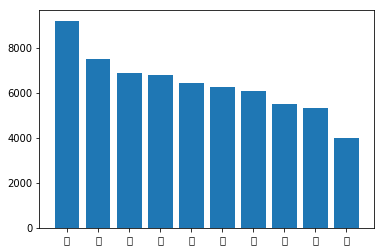

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt

top10 = pd_flat_list.value_counts()[:10]

plt.rcParams['font.family'] = ''  # TODO
plt.bar([n for n in top10.index], [v for v in top10])

### 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．


(array([1.2686e+04, 4.2600e+02, 1.4500e+02, 7.8000e+01, 4.2000e+01,
        3.8000e+01, 1.9000e+01, 1.9000e+01, 1.3000e+01, 8.0000e+00,
        8.0000e+00, 5.0000e+00, 6.0000e+00, 8.0000e+00, 8.0000e+00,
        5.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

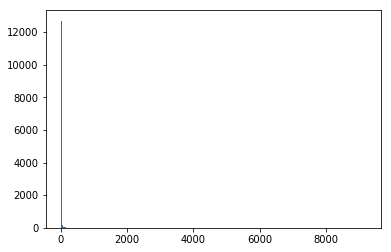

In [172]:
# TODO: '単語の種類数'
plt.hist(pd_flat_list.value_counts(), bins=500)

### 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．
